<a href="https://colab.research.google.com/github/AllanRocha28/Data-Science/blob/public/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## **Análise exploratória**

In [2]:
# Importando as principais bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

As **`features`** foram codificadas, com exceção das variáveis: **Time**, **Amount** e **Class**.

In [3]:
# Lendo o arquivo que contém os dados
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# Exibindo as 5 primeiras linhas das variáveis
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


O número total de entradas no DataFrame é de **284.807** e para a variável Class há o predomínio do número de transações normais (**Class = 0**), conforme esperado.

In [4]:
print("Número de entradas do dataframe e de colunas: {} e {}".format(df.shape[0], df.shape[1]))

Número de entradas do dataframe e de colunas: 284807 e 31


In [5]:
# porcentagem de transações normais e irregulares
transacoes_normal = (df.Class==0).sum()/df.Class.count()*100
transacoes_irregulares = (df.Class==1).sum()/df.Class.count()*100

print("Transações normais: {:.2f}% \nTransações irregulres: {:.2f}%".format(transacoes_normal, transacoes_irregulares))

Transações normais: 99.83% 
Transações irregulres: 0.17%


Além disso, não há valores nulos em nenhuma das `features` conforme pode ser observado abaixo; isso dispensa qualquer tipo de tratamento para valores ausentes.

In [6]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

Podemos perceber na `feature` **Amount** que os valores são dispersos, tendo um valor de desvio-padrão maior que a média. Podemos também perceber nessa variável que os valores da média e da mediana são bem diferentes entre si e, portanto, há outliers presentes nessa variável, conforme percebemos pelo valor máximo.

In [7]:
df[['Amount', 'Class']].describe()

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


Observando de forma mais detalha a nossa variável alvo, **transações irregulares (`Class`=1)**, é possível perceber que o valor médio de **Amount** das transações fraudulentas são maiores do que no dataset original e que para 75% dos valores no dataset original ficam abaixo do valor médio de 88,35, sendo este um ponto de corte interessante para separar as transações normais de suspeitas.

Dessa forma, sugerimos que a partir de um valor de movimentação **acima de 88.35** de unidade da moeda desse determinado país **seja considerado** como uma possível **movimentação bancária suspeita**.

In [8]:
df2 = df[df.Class == 1].copy()
df3 = df.copy()
df2[['Amount']].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


Nos dois primeiros histogramas abaixo percebe-se que para os casos de movimentação bancária normal há uma oscilação no número de ocorrência com o tempo. O mesmo não é percebido para as fraudes que acontecem sem nenhum padrão aparente.

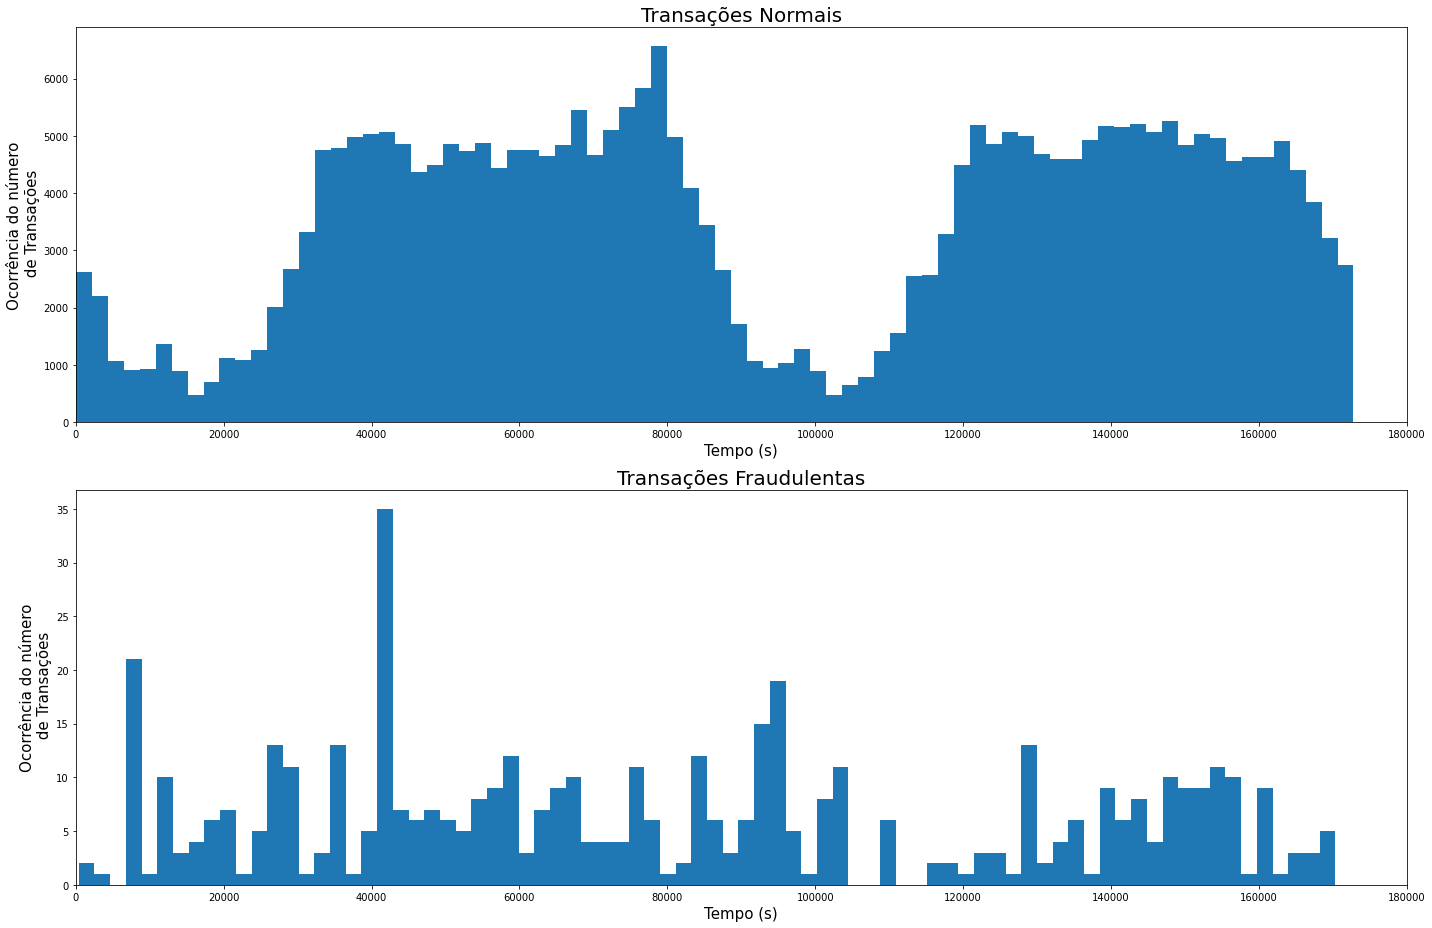

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 13))

num_bins = 80

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Transações Normais', size=20)
ax[0].set_xlabel('Tempo (s)', size=15)
ax[0].set_ylabel('Ocorrência do número\n de Transações', size=15)
ax[0].set_xlim([0, 180000])

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Transações Fraudulentas', size=20)
ax[1].set_xlabel('Tempo (s)', size=15)
ax[1].set_ylabel('Ocorrência do número\n de Transações', size=15)
ax[1].set_xlim([0, 180000])

ax[0].set_facecolor("white")
ax[1].set_facecolor("white")


# salvar imagem
fig = plt.gcf()
fig.tight_layout() # ajusta o tamanho da figura
plt.show()  # plotar gráfico
fig.savefig('gráfico1_hist.jpg', format='jpg')  #Salvando em jpg

Nos dois histogramas seguintes percebe-se que há uma maior movimentação bancária para pequenas quantidade de dinheiro, tanto nas transações normais quanto nas de fraude, e que para ambos os casos o número de movimentação bancária diminui com o aumento da quantidade de dinheiro que se está saquando.

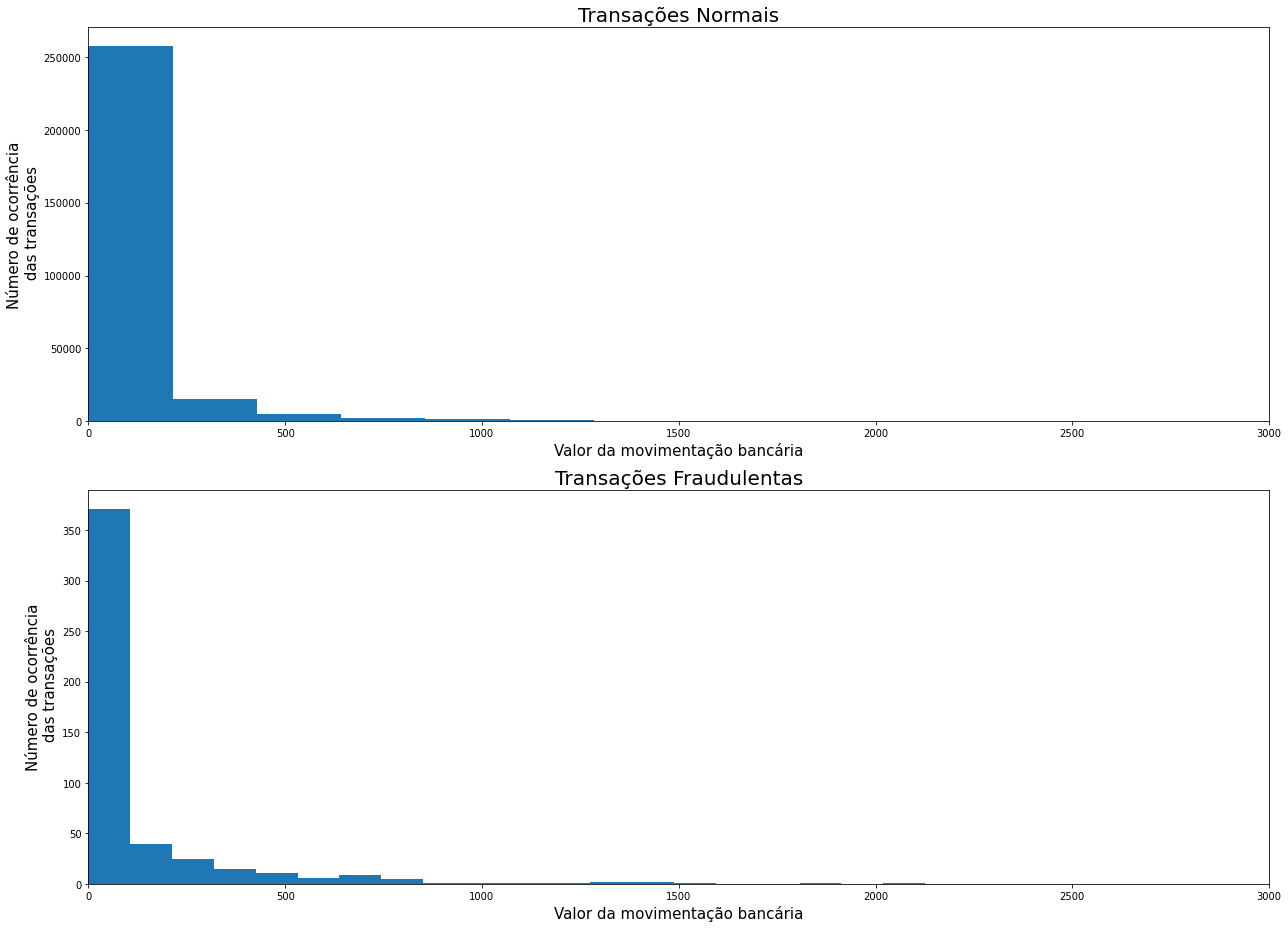

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 13))

num_bins1 = 120
num_bins2 = 20

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins1)
ax[0].set_title('Transações Normais', size=20)
ax[0].set_xlabel('Valor da movimentação bancária', size=15)
ax[0].set_xlim(0, 3000)
ax[0].set_ylabel('Número de ocorrência\n das transações', size=15)

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins2)
ax[1].set_title('Transações Fraudulentas', size=20)
ax[1].set_xlabel('Valor da movimentação bancária', size=15)
ax[1].set_xlim(0,3000)
ax[1].set_ylabel('Número de ocorrência\n das transações', size=15)

ax[0].set_facecolor("white")
ax[1].set_facecolor("white")

# salvar imagem
fig = plt.gcf()
fig.tight_layout() # ajusta o tamanho da figura
plt.show()  # plotar gráfico
fig.savefig('gráfico4_projeto_covid.jpg', format='jpg')  #Salvando em pdf

O que pode ser observado abaixo com o gráfico de violino é que enquanto para os casos de transações normais há uma redução, aparentemente, linear com o aumento dos valores de **Amount**, para os casos de fraude os valores são bem dispersos até próximo de 200.

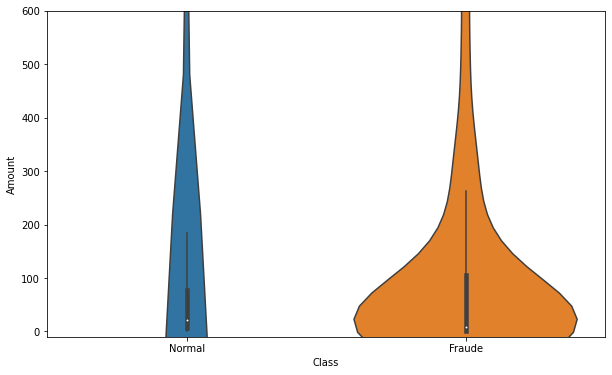

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df, x= 'Class', y= 'Amount')
ax.set_ylim(-10, 600)

plt.xticks([0,1], ['Normal', 'Fraude'])

ax.set_facecolor('white');

## **Criando modelo de detecção de fraude**

Criaremos modelos que possibilitem detectar da melhor forma possível os casos de fraude nos cartões de crédito afim de minimizar as perdas na arrecadação pelo banco.

In [12]:
''' Importação das bibliotecas para dividir os dados em treino e teste
e métricas de avaliação para mensurar os modelos criados.'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

### **Criando o modelo**

Inicialmente criaremos um modelo de **regressão logística** pois este se adequa ao tipo de dados que estamos analizando: **0 - não fraude** e **1 - fraude**; utilizaremos os dados do nosso dataset original para a construção do modelo e em seguida analisaremos sua eficiência a partir das métricas importadas.

In [13]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Istanciar e escolher os hyperparâmetros
model=LogisticRegression()

# 3. Separar os dados em feature matrix e target vector
X = df.drop('Class', axis=1)
y = df['Class']

# 3.1 Dividir dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

### **Relatório de classificação**

Percebemos no relatório de classificação abaixo que o modelo apresenta bons resultados para classificar os casos de **não fraude**, porém este não é o foco deste projeto.

Para os casos de **fraude** os resultados são inferiores aos **de não fraude** e o modelo não consegue classificar corretamente alguns dos casos, o que mostra a fragilidade no sistema de segurança do cartão de crédito e prejuízo a vida do correntista.

In [14]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n\n", classification_report(y_test, y_pred, digits=4))

print('-------------------------------------------------------------')
# imprimir a acurácia do modelo
print("\nAcurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:

               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     71076
           1     0.8981    0.7698    0.8291       126

    accuracy                         0.9994     71202
   macro avg     0.9489    0.8848    0.9144     71202
weighted avg     0.9994    0.9994    0.9994     71202

-------------------------------------------------------------

Acurácia: 0.9994

AUC: 0.8848



Abaixo é possível ver na Matriz de confusão quão bem o modelo classificar os casos de **não fraude**. Isso se deve ao fato do nosso dataset ser desbalanceado, tendo **99.83%** de movimentações bancárias normais.

Dessa forma o modelo fica enviesado, sendo muito bom em classificar os casos normais de movimentação, o que não contribuí para a redução do prejuízo do banco.

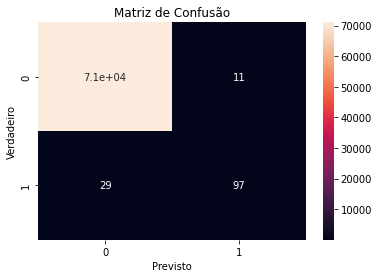

In [15]:
fig, ax = plt.subplots()

# plotar a matrix de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

### **Balanceamento dos dados e novo modelo**

Como os dados estão desbalanceados, **99.83% de casos normais (0) e 0.17% de fraude (1)**, é necessário balancear os dados antes de criar um novo modelo afim de que este consiga classificar melhor os casos de fraude do cartão de crédito.

O modelo atodado neste projeto foi o de replicar os casos de fraude a partir das informações já contidas sobre este tipo de ocorrência. Foi adotado esta metodologia para que os dados de transações normais não fossem excluídas, o que empobreceria o dataframe.

In [16]:
from imblearn.under_sampling import RandomUnderSampler

#sns.set_style('dark')

Abaixo é possível ver o resultado do balanceamento dos dados.

Agora há a mesma quantidade de dados para os casos de fraude e não fraude.

Criaremos um novo modelo com esses dados balanceados para observar os resultados e os valores das métricas de avaliação.

In [17]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train);

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
#sns.countplot(y_res);

0    366
1    366
Name: Class, dtype: int64


Observamos neste novo modelo, agora com os dados balanceados, que a **acurácia global** diminuiu de **99.93%** para **95.33%** o que, a princípio, refletiria numa piora na capacidade em classificar corretamente os casos de fraude e não fraude. Contudo, somente a acurácia não é o sufiente para avaliar uma melhora ou piora de forma detalhada.

-------------------------------------------------------------

O **AUC** é uma métrica não tão sensível aos desbalanço das classes e corresponde a qualidade do modelo. Seu valor subiu de **89.13%** para **93.66%** ou seja, o modelo classificar mais corretamente agora do que antes do balanceamento.

-------------------------------------------------------------

Apesar da precisão ter diminuído pra a nossa variável alvo, **fraude** (**Class=1**), o valor de **recall** aumentou o que indica que nosso modelo é mais sensível agora em classificar os casos de fraude do que antes.

In [18]:
# Istanciar e escolher os hyperparâmetros
model_res=LogisticRegression()
model_res.fit(X_res, y_res)

# Fazendo previsões
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9522    0.9755     71076
           1     0.0347    0.9683    0.0670       126

    accuracy                         0.9523     71202
   macro avg     0.5173    0.9602    0.5212     71202
weighted avg     0.9982    0.9523    0.9739     71202

Acurácia: 0.9523

AUC: 0.9602



Na matriz de confusão abaixo podemos ver que há um aumento na classificação do número de casos de fraude tanto para os casos verdadeiramente de fraude quanto para os casos de não fraude.

Apesar do nosso modelo aumentar significativamente quando não há fraude, isso representa um ganho na segurança devido ao uso indevido do cartão de crédito reflito em menores perdas financeiras do sistema credor.

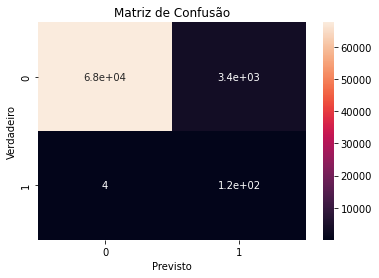

In [19]:
fig, ax = plt.subplots()

# plotar a matrix de confusão
# skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
sns.heatmap(confusion_matrix(y_test, y_pred_res), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

### **Decision Tree**

Criaremos uma árvore de decisão (*decision tree*) para entender quais variáveis auxiliam no processo de separação entre os casos de fraude e não fraude; olharemos a partir do hiperparâmetro *entropy* que busca diminuir a entropia dos sistema, tornando nossos dados mais puros.

Observando a ávore de decisão até a profundidade igual a três, para evitar **overfitting**, vê-se que as principais variáveis para separar os casos de fraude e não fraude são: **v17**, **v12**, **v10** e **v26**.

In [29]:
# 1. escolher e importar um modelo
from sklearn.tree import DecisionTreeClassifier

# 2. Instanciar e escolher os hyperparameters
model = DecisionTreeClassifier(max_depth=3, criterion="entropy")

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('Class', axis=1)
y = df['Class']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

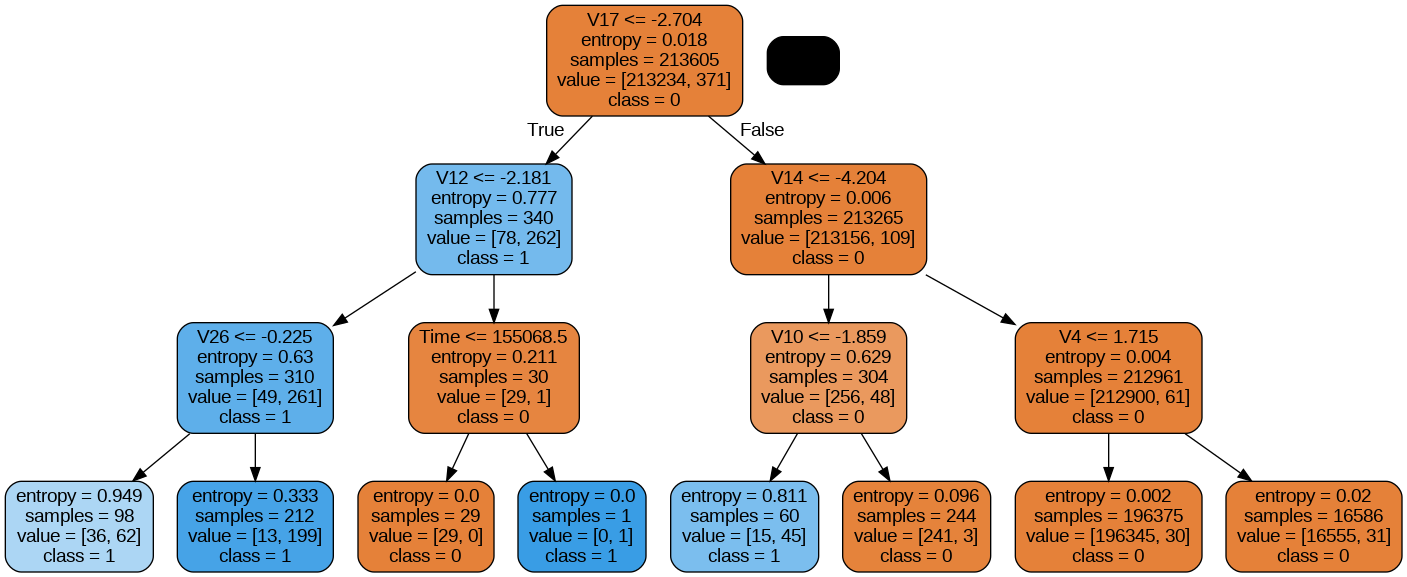

In [30]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)

Image(graph.create_png())

## Conclusão

* O primeiro modelo criado apresentava uma tendência em classificar melhor os casos de não fraude devido ao fato dele ter sido treinado a partir de dados desbalanceados, favorecendo as transações bancárias normais. Este modelo se colocado em uso (produção) iria acarretar em perdas financeiras e prejuízo ao dono do cartão fraudado.

* O segundo modelo, agora com os dados balanceados, melhorou na capacidade em detectar transações fora da normalidade classificando um número maior de fraudes de cartão de crédito. Há de se ressaltar que houve um aumento nos casos de não fraude agora classificado como fraudes esse aumento, apesar de errado, garante uma margem de segurança aos bncos e aos correntistas contra a possibilidade de fraudes do cartão.

* Portanto, uma melhora dos modelos de Machine Learning envolve em balancear os dados. Esse processo pode resultar em perdas na avaliação globamente ou de uma das classes, mas às vezes esse recurso é necessário para aumentar na acertividade da nossa variável alvo pelo modelo.